In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
def getDataYahoo(symbols,start_date,end_date,paraCol):
    data_source="yahoo"
    panel_data = data.DataReader(symbols, data_source, start_date, end_date)
    df_tmp = panel_data[str(paraCol)]
    all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')
    df_tmp = df_tmp.reindex(all_weekdays)
    df_clean = dataCleaning(df_tmp)
    return df_clean
    
def dataCleaning(df):
    df_tmp = df.fillna(method="ffill")
    df_clean = df_tmp.fillna(method="bfill")
    return df_clean
    
def getDataCSV(symbol):
    return pd.read_csv("data/{}.csv".format(str(symbol)), header =0, usecols=['Date','Close'],index_col=['Date'])

def plotData(df,title="",x="",y=""):
    ax = df.plot(title=title)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    plt.show()
    
def plotHistData(df,title="",x="",y="",b=20,mean=999,std=999):
    ax = df.hist(bins=b)
    ax.set_title = title
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    if (mean != 999) and (std != 999) :
        plt.axvline(mean,color="y",linestyle="dashed",linewidth=2)
        plt.axvline(std,color="r",linestyle="dashed",linewidth=2)
        plt.axvline(-std,color="r",linestyle="dashed",linewidth=2)
    plt.show()
    
def plotHistDataMulti(df,tickers,title="",x="",y="",b=20,mean=999,std=999):
    for symbol in tickers:
        df[str(symbol)].hist(bins=20, label=str(symbol))
    plt.legend(loc='upper right')
    plt.show()
    
def dailyReturns(df):
    dr = df.copy()
    dr[1:] = (dr[1:] / dr[:-1].values) - 1
    dr.iloc[0] = 0
    #dr.iloc[0,:] = 0
    return dr

def dailyReturnsMulti(df):
    dr = df.copy()
    dr[1:] = (dr[1:] / dr[:-1].values) - 1
    #dr.iloc[0] = 0
    dr.iloc[0,:] = 0
    return dr
    
def plotScatterMulti(df,x="",y="",polyDegree=1):
    df.plot(kind='scatter',x=str(x),y=str(y))
    beta,alpha = np.polyfit(df[str(x)],df[str(y)],polyDegree) 
    plt.plot(df[str(x)], beta*df[str(x)] + alpha,'-', color='r')
    plt.show()

In [3]:
tickers = ["AAPL","GOOG","MSFT"]
stocks = getDataYahoo(tickers,"2017-01-01","2017-09-28","Close")

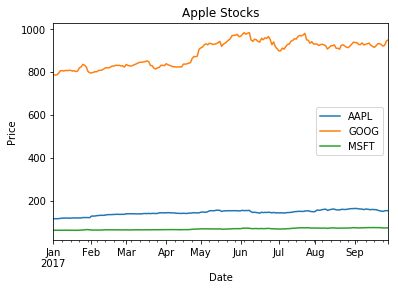

In [9]:
plotData(stocks,"Apple Stocks","Date","Price")